# init
Include any initialization and paste any function needed here...

In [ ]:
# init
import math
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

def newtonRaphson(func, dfunc, x0, tol = 1e-4, maxit = 50, *args): #newtonRaphson function
    """Finds roots of a function using Newton-Raphson method

    newtonRaphson(func, dfunc, x0, tol = 1e-4, maxit = 50, *args)
    Finds roots of a function (f(x)=0) using Newton-Raphson method
    Input:
    - func: an anonymous function for f(x)
    - dfunc: an anonymous function for the derivative of f(x)
    - x0: initial guess of the root
    - tol : error tolerance (%) (default = 0.0001%)
    - maxit: maximum number of iterations (default = 50)
    - *args: any extra arguments to func (optional)
    Output:
    - xr: the root
    - fx: value of func at the root
    - err: relative approximate error (%)
    - iter: number of iterations
    """
    
        
    iter = 0    # initial value of iteration count
    err = 1000  # initial value of relative approximate error (%)
    small = 1e-20 # a small number
    xr = x0
    
    while err > tol and iter < maxit: # while err is greater than the tolerance (tol)
                                      # and iter < maxit continue the loop        
       iter = iter + 1 # increment iter
       xr_old = xr     # save the previous copy of xr for error calculation
       fx = func(xr, *args)   #func value at xr 
       if fx == 0: # if fx=0, xr is the root -> terminate the function
           err = 0
           return xr, fx, err, iter
       dfx = dfunc(xr, *args) #derivative of func value at xr 
       xr = xr - fx / (dfx + small)        # (a small number is added to the 
                                           # denominator to avoid /0 in case dfx=0)

       err=abs((xr-xr_old)/(xr + small))*100 # relative approximate error (%)
                                           # (a small number is added to the 
                                           # denominator to avoid /0 in case xr=0)
       
    root = xr
    fx = func(root, *args)
    if iter == maxit: # show a warning if the function is terminated due to iter=maxit
        print('Warning: newtonRaphson function is terminated because iter=maxit;') 
        print('         error < tolerance stopping criterion may not be satisfied')

    return xr, fx, err, iter   #returns xr, fx, err, iter


def minGolden(func, xl, xu, tol = 1e-4, maxit = 50, *args): #bisection function
    """Finds the minimum of a function using golden section search method

    minGolden(func, xl, xu, tol = 1e-4, maxit = 50, *args)
    Finds the minimum of a one-dimensional function within an interval
    using golden section search method
    Input:
    - func: an anonymous function for f(x)
    - xl, xu: lower and upper limits of the interval
    - tol : error tolerance (%) (default = 0.0001%)
    - maxit: maximum number of iterations (default = 50)
    - *args: any extra arguments to func (optional)
    Output:
    - xmin: the location of the minimum
    - fx: the minimum value of function
    - err: relative approximate error (%)
    - iter: number of iterations
    """
    
    small = 1e-20 # a small number
    phi = (1 + 5**0.5) / 2;  #golden ratio
    iter = 0    # initial value of iteration count
    err = 1000  # initial value of relative approximate error (%)
        
    d = (phi - 1) * (xu - xl)
    x1 = xl + d
    x2 = xu - d
    f1 = func(x1, *args) #func value at x1
    f2 = func(x2, *args) #func value at x2    
    
    #                         |<------ d ----->|
    # arrangement of points: xl ..... x2 ..... x1 ..... xu
    #                                 |<------ d ------>|
    
    while err > tol and iter < maxit: # while err is greater than the tolerance (tol) 
                                      # and iter < maxit continue the loop
       iter = iter + 1 # increment iter
       if f1 < f2:  # x1 is the new estimate of min -> xmin=x1, discard [xl,x2]
           xmin = x1
           xl = x2
           x2 = x1
           f2 = f1
           dx = xu - xl
           d = (phi - 1) * dx
           x1 = xl + d
           f1 = func(x1, *args)
       else: # f2 >= f1: x2 is the new estimate of min -> xmin=x2, discard [x2,xu]
           xmin = x2
           xu = x1
           x1 = x2
           f1 = f2
           dx = xu - xl
           d = (phi - 1) * dx
           x2 = xu - d
           f2 = func(x2, *args)    
       
       err = (2 - phi) * abs(dx / (xmin + small)) * 100  # relative approximate error (%)
                                                       # (a small number is added to the 
                                                       # denominator to avoid /0 in case xm=0)
    
    fmin = func(xmin, *args)
    if iter == maxit: # show a warning if the function is terminated due to iter=maxit
        print('Warning: minGolden function is terminated because iter=maxit;') 
        print('         error < tolerance stopping criterion may not be satisfied')
    return xmin, fmin, err, iter   #returns xmin, fmin, err, iter    

#Q1

You are designing a spherical tank (Figure below) to hold water for a small village in a developing country. The volume of liquid it can hold can be computed as $ V=\pi h^{2}{3R-h \over3}$ where $V$ = volume [$\rm{m^3}$], $h$ = depth of water in tank [m], and $R$ = the tank radius [m]. If $R = 3$ m, what depth must the tank be filled to so that it holds $30 \,\rm{[m^3]}$? 

1.   Use three iterations of the most efficient numerical method possible by hand to determine your answer. Determine the approximate relative error after each iteration. Also, provide justification for your choice of method. Extra information: if you choose a bracketing methods, initial guesses of $0$ and $R$ will bracket a single root for this example; if you choose open methods, an initial guess of $R$ will always converge. 
2.   Use a root finding method in python with the error tolerance of $10^{-4}\%$ and compare your result with Part 1.


![alt text](https://docs.google.com/uc?id=1B_bH76MquHdrZgnL7K80eOaUXSYMEhTX)

I chose to use the Newton Raphson method beacuse it approaches the root faster and more efficiently than the bracket methods.
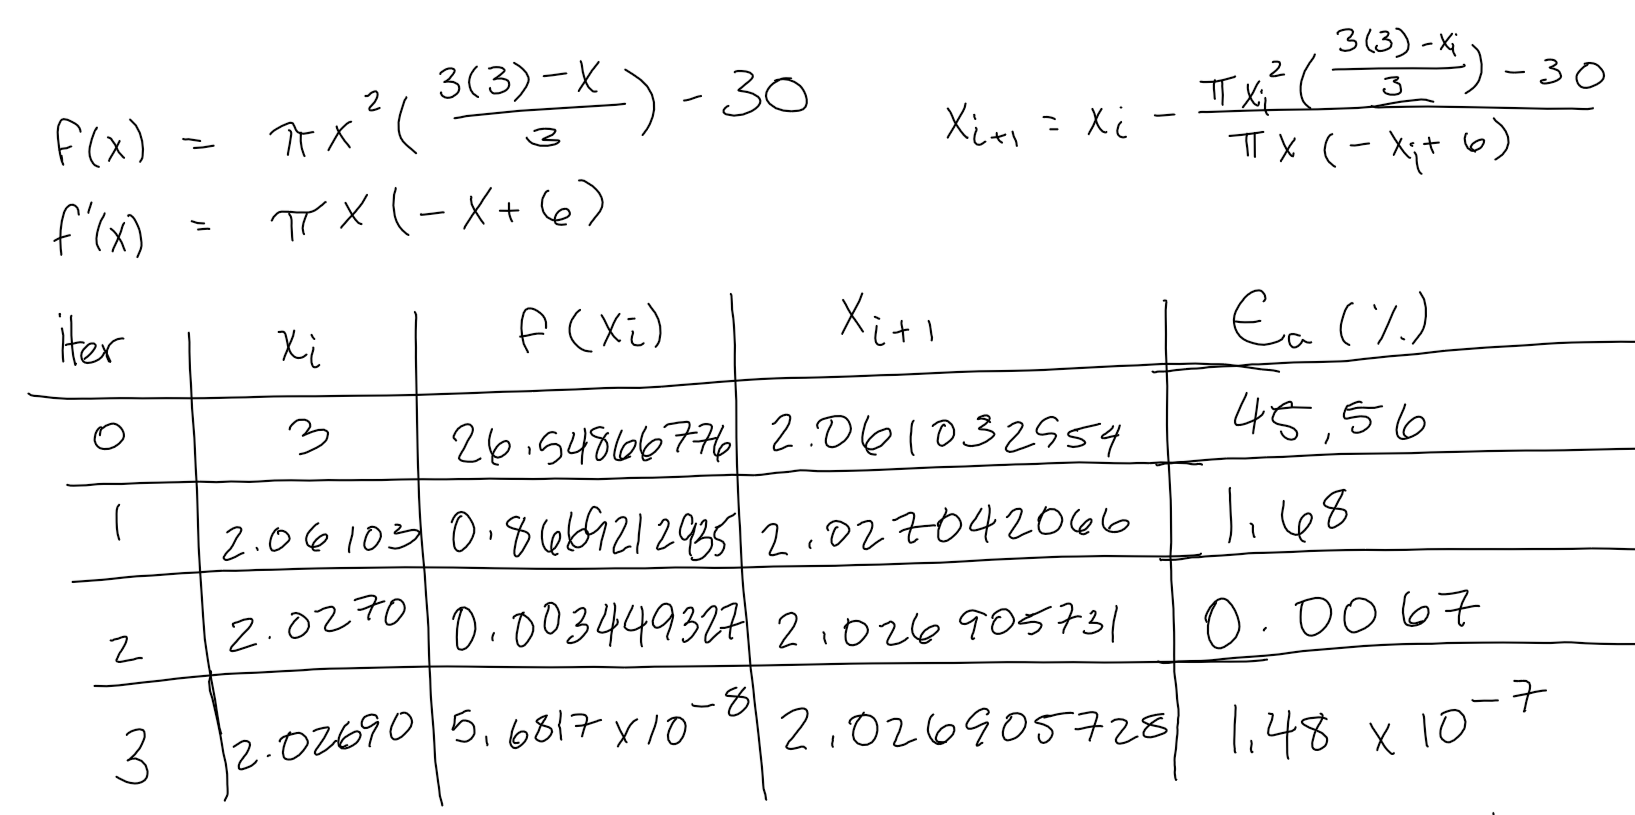

In [ ]:
# Q1 solution
x0 = 3
f = lambda h: (math.pi*(h**2)*((3*3-h)/3)) - 30
df = lambda h: math.pi*h*((-h)+6)
root, fx, err, iter = newtonRaphson(f, df, x0)
#xf = fsolve(f, x0, fprime=df, xtol=1e-4)
#print('root: ', xf)
print('root: ', root)
print('f(x): ', fx)
print('Error: ', err)
print('Iterations: ', iter)

root:  2.0269057283100134
f(x):  3.552713678800501e-15
Error:  1.1079853154462933e-07
Iterations:  4


#Q2

Starting with `newtonRaphson` function, develop a function for the modified secant root finding method which takes the initial guess $x_{0}$ and the perturbation fraction $\delta$ as input arguments, as shown below. Apply the function to find the root of $x^3-6x^2+11x-6.1=0$ with initial guess of $x_0=3$. Validate your result using the python built-in `roots` and `fsolve` functions.

In [ ]:
# Q2 solution
def modsecant(func, x0, delta = 1e-5, tol = 1e-4, maxit = 50, *args): #modsecant function
    """Finds roots of a function using modified secant method

    modsecant(func, x0, delta = 1e-5, tol = 1e-4, maxit = 50, *args)
    ...
    """
    
    iter = 0    # initial value of iteration count
    iter2 = 0    
    err = 1000  # initial value of relative approximate error (%)
    err2 = 1000
    xr = x0
    xr2 = x0
    
    while err > tol and iter < maxit: # while err is greater than the tolerance (tol)
                                      # and iter < maxit continue the loop        
       iter = iter + 1 # increment iter
       xr_old = xr     # save the previous copy of xr for error calculation
       fx = func(xr)   #func value at xr
       fx2 = func(xr + xr * delta) 
       if fx == 0: # if fx=0, xr is the root -> terminate the function
           err = 0
           return xr, fx, err, iter 
       xr = xr - ((fx * xr * delta) / (fx2 - fx))

       err=abs((xr-xr_old)/(xr))*100 # relative approximate error (%)
                                           # (a small number is added to the 
                                           # denominator to avoid /0 in case xr=0)
       
    root = xr
    fx = func(root)

    delta2 = 1e-6

    while err2 > tol and iter2 < maxit: # while err is greater than the tolerance (tol)
                                      # and iter < maxit continue the loop        
       iter2 = iter2 + 1 # increment iter
       xr_old2 = xr2     # save the previous copy of xr for error calculation
       fx3 = func(xr2)   #func value at xr
       fx4 = func(xr2 + xr2 * delta2) 
       if fx3 == 0: # if fx=0, xr is the root -> terminate the function
           err2 = 0
           return xr2, fx2, err2, iter2 
       xr2 = xr2 - ((fx3 * xr2 * delta2) / (fx4 - fx3))

       err2=abs((xr2-xr_old2)/(xr2))*100 # relative approximate error (%)
                                           # (a small number is added to the 
                                           # denominator to avoid /0 in case xr=0)
       
    root2 = xr2
    fx3 = func(root2)

    return xr, fx, err, iter, xr2, fx3, err2, iter2   #returns xr, fx, err, iter

x0 = 3
coeffs = [1, -6, 11, -6.1]
pyhtonroots = np.roots(coeffs)
f = lambda x: (x**3) - (6 * x**2) + (11 * x) - 6.1 
x, fx, ea, iter, x2, fx2, ea2, iter2 = modsecant(f, x0)
print('Delta = 1e-5')
print('x = ', x)
print('f(x)=', fx)
print('apprx. error (%)=',ea)
print('num. iter =', iter)  
print('')
print('Delta = 1e-6')
print('x = ', x2)
print('f(x)=', fx2)
print('apprx. error (%)=',ea2)
print('num. iter =', iter2)  
print('')
print('fsolve method =', fsolve(f, x0))
print('')
print('roots method =', pyhtonroots)

Delta = 1e-5
x =  3.0466805318046415
f(x)= 9.059419880941277e-14
apprx. error (%)= 3.112813116423303e-08
num. iter = 4

Delta = 1e-6
x =  3.046680531804603
f(x)= 1.7763568394002505e-15
apprx. error (%)= 1.2256485736458988e-08
num. iter = 4

fsolve method = [3.04668053]

roots method = [3.04668053 1.89896874 1.05435073]


#Q3

In thermodynamics the specific heat $c_{p}\,[kJ/(kg K)]$ for air can be expressed as a polynomial in terms of temperature $T\, [K]$ as
$
c_{p}=0.99403+1.671\times 10^{-4}T+9.7215\times10^{-8}T^{2}-9.5838\times 10^{-11}T^{3}+1.9520\times 10^{-14}T^{4}
$

1.   Use the python function developed in Problem Q2 for the modified secant method to find $T$ when $c_{p}=1.1\,[kJ/(kg K)]$. Use initial guess of $T_{0}=300\,K$.
2.   Use Newton-Raphson method in python and compare your results with that of Part 1. Use pyhton `fsolve` function to validate your result.
3. Use pyhton `roots` function to assess the accuracy Part 1 and 2 results. You may find multiple roots. You need to rule out the unphysical ones.

In [ ]:
# Q3 solution
c = lambda t: 0.99403 + (1.671 * (t*(10**(-4)))) + (9.7215 * ((t**2)*(10**(-8)))) - (9.5838 * ((t**3)*(10**(-11))))+ (1.9520 * ((t**4)*(10**(-14)))) - 1.1
dfc = lambda t: 7.808*((10**-14)*(t**3)) - 2.87514 * (10**(-10)*(t**2)) + 1.9443 * (10**(-7)*t) + .0001671
t0 = 300
co = [(1.9520 * (10**(-14))),((-9.5838) * (10**(-11))), (9.7215 * (10**(-8))), (1.671 * (10**(-4))), 0.99403-1.1]

fs = fsolve(c, t0)
nr = newtonRaphson(c, dfc, t0)
pr = np.roots(co)
x, fx, ea, iter, x2, fx2, ea2, iter2 = modsecant(c, t0)

print('Modsecant Delta = 1e-5')
print('x = ', x)
print('f(x)=', fx)
print('apprx. error (%)=',ea)
print('num. iter =', iter)  
print('')
print('Modsecant Delta = 1e-6')
print('x = ', x2)
print('f(x)=', fx2)
print('apprx. error (%)=',ea2)
print('num. iter =', iter2)  
print('')
print('fsolve method =', fs)
print('')
print('Newton Raphson method')
print('Root = ', nr[0])
print('Fx = ', nr[1])
print('Error = ', nr[2])
print('num. iter = ', nr[3])
print('')
print('Python roots method = ', pr)

Modsecant Delta = 1e-5
x =  544.0875376556794
f(x)= 3.397282455352979e-14
apprx. error (%)= 4.943459654417533e-05
num. iter = 3

Modsecant Delta = 1e-6
x =  544.0875376555186
f(x)= 1.9984014443252818e-15
apprx. error (%)= 4.927492307693045e-05
num. iter = 3

fsolve method = [544.08753766]

Newton Raphson method
Root =  544.0875376554998
Fx =  -1.9984014443252818e-15
Error =  4.925695790937995e-05
num. iter =  3

Python roots method =  [ 2748.33708475+1126.28559147j  2748.33708475-1126.28559147j
 -1131.0281006    +0.j           544.08753766   +0.j        ]


#Q4

Determine the maximum location, $x_{max}$, and the maximum value, $f(x_{max})$, of the following function 
$
f(x)=-0.8x^{4}+2.2x^{2}+0.6
$

Using:

1. Golden-section search method by hand. Use initial guesses of $x_l = 0.7$ and $x_{u} = 1.4$ and perform sufficient iterations so that the tolerance $\epsilon_{s} = 10\%$. Determine the approximate relative error of your final result. Use Python `minGolden` function with the same error tolerance and compare the result with your hand calculations.
2. Python `minGolden` function with the error tolerance of $10^{-4}\%$ and compare the result with those from Python built-in function `fmin`.

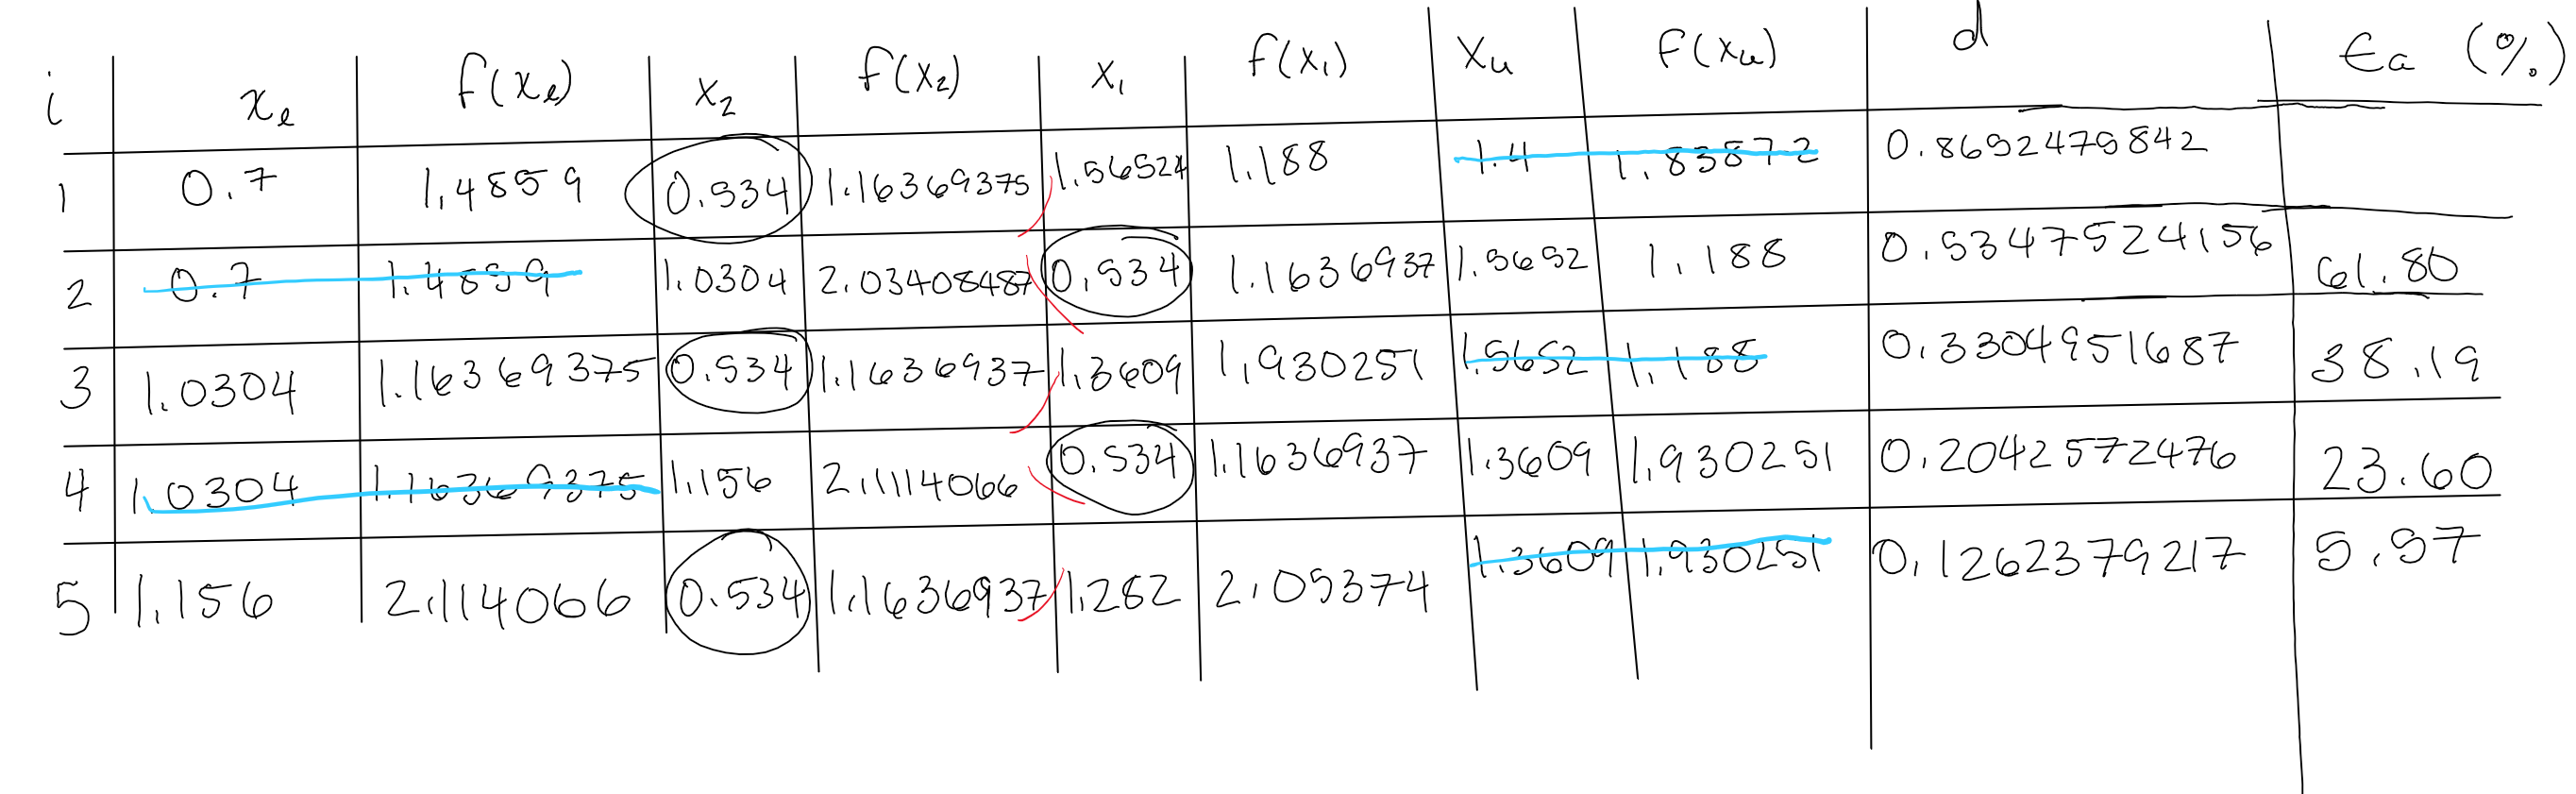

In [ ]:
# Q4 solution
f = lambda x: (-.8 * (x**4)) + (2.2 * (x**2)) + 0.6
fminus = lambda x: -f(x)
xmin, fminus_min, err , iter= minGolden(fminus, 0.7, 1.4, tol=10)  #calling the minGolden function with the default tol and maxit values
xmax = xmin
fmax = -fminus_min 
print('max. location: x= ', xmax)
print('max. of f(x)= ', fmax)
print('approximate error = ', err, '%')
print('number of iterations = ', iter)
print('')
xmin, fminus_min, err , iter= minGolden(fminus, 0.7, 1.4, tol=1e-4)  #calling the minGolden function with the default tol and maxit values
xmax = xmin
fmax = -fminus_min 
print('max. location: x= ', xmax)
print('max. of f(x)= ', fmax)
print('approximate error = ', err, '%')
print('number of iterations = ', iter)
print('')
minimum = fmin(fminus, 0.7)
x_fmin = minimum[0]

max. location: x=  1.1326237921249263
max. of f(x)=  2.105704734195147
approximate error =  9.016994374947423 %
number of iterations =  2

max. location: x=  1.1726042424395098
max. of f(x)=  2.1124999999995975
approximate error =  8.400258521825505e-05 %
number of iterations =  26

Optimization terminated successfully.
         Current function value: -2.112500
         Iterations: 16
         Function evaluations: 32


#Q5

Figure below shows a uniform beam subject to a linearly increasing distributed load.The equation for the resulting elastic curve is
$
y={w_{0} \over 120\,E\,I\,L} (-x^{5}+2L^{2}x^{3}-L^{4}x)
$
where $L = 600\,cm$, $E = 50,000\,\rm{kN/cm^{2}}$, $I = 30,000\, \rm{cm^{4}}$, and $w_{0} = 2.5\,kN/cm$.


1. Determine the approximate point of maximum deflection graphically by plotting this function.
2. Use the gradient method in python (*i.e.*, a root finding method for $dy/dx = 0$) to determine the point of maximum deflection $x_{max}$. Then, substitute this value into the equation above to determine the value of the maximum deflection.
3. Use the direct (non-gradient) method in python to determine the point of maximum deflection. This is done by using the `minGolden` function until the approximate error falls below $\epsilon_{s} = 1\%$ with initial guesses of $x_l = 0$ and $x_u = L$. Compare your predictions with those of Parts (1) and (2).

![alt text](https://docs.google.com/uc?id=1BeqWyUDU8TzawN-AmsFvaTssQcJfIDyE)

max. location by root finding: x= 268.3281572999748 cm
max. of f(x) by root finding = 0.5151900620159516 cm
error =  2.1184291441043393e-14 %
number of iterations=  4
g'(xmin) =  -1.7888543819998316e-05 < 0, therefore, the optiminum point is a maximum.

max. location: x= 268.32810221137163 cm
max. of f(x)= 0.5151900620159243 cm
approximate error =  7.427937546819042e-05 %
number of iterations =  29


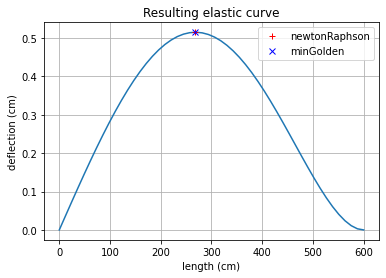

In [ ]:
# Q5 solution
f = lambda x: -1 * (2.5 / (120 * 50000 * 30000 * 600))*((-x**5) + (2*(600**2)*(x**3)) - (600**4)*x)
g = lambda x: -1 * (2.5 / (120 * 50000 * 30000 * 600))*(-5*(x**4) + (6*(600**2)*(x**2)) - (600**4))
dg = lambda x: -1 * (2.5 / (120 * 50000 * 30000 * 600))*(-20*(x**3) + (12*(600**2)*(x)))
l = np.linspace(0, 600)
xmin1, gmin, err , iter = newtonRaphson(g, dg, 200)  #calling the newtonRasphson function for g(x)=0
print(f'max. location by root finding: x= {xmin1} cm')
print(f'max. of f(x) by root finding = {f(xmin1)} cm')
print('error = ', err, '%')
print('number of iterations= ', iter)
print('g\'(xmin) = ', dg(xmin1) ,'< 0, therefore, the optiminum point is a maximum.')
print('')
fminus = lambda x: -f(x)
xmin2, fminus_min, err , iter= minGolden(fminus, 0, 600)  #calling the minGolden function with the default tol and maxit values
xmax = xmin2
fmax = -fminus_min
print(f'max. location: x= {xmax} cm')
print(f'max. of f(x)= {fmax} cm')
print('approximate error = ', err, '%')
print('number of iterations = ', iter)

plt.plot(l, f(l))
plt.plot(xmin1, f(xmin1), 'r+', label = 'newtonRaphson')
plt.plot(xmin2, f(xmin2), 'bx', label = 'minGolden')
plt.xlabel('length (cm)')
plt.ylabel('deflection (cm)')
plt.title('Resulting elastic curve')
plt.legend()
plt.grid('true');